<a href="https://colab.research.google.com/github/Jahanavi-Golla/DS_projects/blob/main/Wallmart_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install ydata_profiling


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.3/352.3 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 10.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 28.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=1aeffa8c2382f300a5d98ceb917e08c12391d5a1667494ac1fcd200152a1ac7b
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: wordcloud
    Found existing installation: wordcloud 1.8.2.2
    

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport

In [7]:
data = pd.read_csv("/content/Walmart.csv")

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [9]:
len(data.Date.unique())

143

In [10]:
data.groupby(['Date'])['Weekly_Sales'].count()

Date
01-04-2011    45
01-06-2012    45
01-07-2011    45
01-10-2010    45
02-03-2012    45
              ..
30-07-2010    45
30-09-2011    45
30-12-2011    45
31-08-2012    45
31-12-2010    45
Name: Weekly_Sales, Length: 143, dtype: int64

In [11]:
data.Store.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

We have in total 45 stores, and the sales of these 45 stores for 143 days are given.


In [12]:
data['Date'] = pd.to_datetime( data['Date'], dayfirst=True)

Since this is a regression problem , we ll be splitting the Date column into 3 columns as year, month and day

In [13]:
data['year']= data['Date'].apply(lambda time: time.year)
data['month']= data['Date'].apply(lambda time: time.month)
data['day']= data['Date'].apply(lambda time: time.day)

In [14]:
data.head()

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-02-05    1643690.90             0        42.31       2.572   
1      1 2010-02-12    1641957.44             1        38.51       2.548   
2      1 2010-02-19    1611968.17             0        39.93       2.514   
3      1 2010-02-26    1409727.59             0        46.63       2.561   
4      1 2010-03-05    1554806.68             0        46.50       2.625   

          CPI  Unemployment  year  month  day  
0  211.096358         8.106  2010      2    5  
1  211.242170         8.106  2010      2   12  
2  211.289143         8.106  2010      2   19  
3  211.319643         8.106  2010      2   26  
4  211.350143         8.106  2010      3    5

date column is no longer required, hence dropping it.

In [15]:
data.drop(['Date'],axis=1,inplace=True)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Weekly_Sales  6435 non-null   float64
 2   Holiday_Flag  6435 non-null   int64  
 3   Temperature   6435 non-null   float64
 4   Fuel_Price    6435 non-null   float64
 5   CPI           6435 non-null   float64
 6   Unemployment  6435 non-null   float64
 7   year          6435 non-null   int64  
 8   month         6435 non-null   int64  
 9   day           6435 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 502.9 KB


In [17]:
data.Holiday_Flag.unique()

array([0, 1])

In [18]:
data.year.unique()

array([2010, 2011, 2012])

In [19]:
data.month.unique()

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1])

Summary

In [20]:
Report = ProfileReport(data)

In [21]:
Report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Weekly Sales of Each store

In [22]:
data.groupby(['Store'])['Weekly_Sales'].sum()

Store
1     2.224028e+08
2     2.753824e+08
3     5.758674e+07
4     2.995440e+08
5     4.547569e+07
6     2.237561e+08
7     8.159828e+07
8     1.299512e+08
9     7.778922e+07
10    2.716177e+08
11    1.939628e+08
12    1.442872e+08
13    2.865177e+08
14    2.889999e+08
15    8.913368e+07
16    7.425243e+07
17    1.277821e+08
18    1.551147e+08
19    2.066349e+08
20    3.013978e+08
21    1.081179e+08
22    1.470756e+08
23    1.987506e+08
24    1.940160e+08
25    1.010612e+08
26    1.434164e+08
27    2.538559e+08
28    1.892637e+08
29    7.714155e+07
30    6.271689e+07
31    1.996139e+08
32    1.668192e+08
33    3.716022e+07
34    1.382498e+08
35    1.315207e+08
36    5.341221e+07
37    7.420274e+07
38    5.515963e+07
39    2.074455e+08
40    1.378703e+08
41    1.813419e+08
42    7.956575e+07
43    9.056544e+07
44    4.329309e+07
45    1.123953e+08
Name: Weekly_Sales, dtype: float64

([<matplotlib.axis.XTick at 0x7f79deea7b80>,
  ...],
 [Text(1, 0, '1'),
  Text(1, 0, '1'),
  Text(1, 0, '1'),
  Text(1, 0, '1'),
  Text(1, 0, '1'),
  Text(1, 0, '1'),
  Text(1, 0, '1'),
  Text(1, 0, '1'),
  Text(1, 0, '1'),
  Text(1, 0, '1'),
  Text(1, 0, '1'),
  Text(1, 0, '1'),
  Text(1, 0, '1'),
  Text(1, 0, '1'),
  Text(1, 0, '1'),
  Text(1, 0, '1'),
  Text(1, 0, '1'),
  Text(1, 0, '1'),
  Text(1, 0, '1'),
  Text(1, 0, '1'),
  Text(1, 0, '1'),
  Text(1, 0, '1'),
  Text(1, 0, '1'),
  Text(1, 0, '1'),
  Text(1, 0, '1'),
  Text(1, 0, '1'),
  Text(1, 0, '1'),
  Text(1, 0, '1'),
  Text(1, 0, '1'),
  Text(1, 0, '1'),
  Text(1, 0, '1'),
  Text(1, 0, '1'),
  Text(1, 0, '1'),
  Text(1, 0, '1'),
  Text(1, 0, '1'),
  Text(1, 0, '1'),
  Text(1, 0, '1'),
  Text(1, 0, '1'),
  Text(1, 0, '1'),
  Text(1, 0, '1'),
  Text(1, 0, '1'),
  Text(1, 0, '1'),
  Text(1, 0, '1'),
  Text(1, 0, '1'),
  Text(1, 0, '1'),
  Text(1, 0, '1'),
  Text(1, 0, '1'),
  Text(1, 0, '1'),
  Text(1, 0, '1'),
  Text(1, 0, '1'

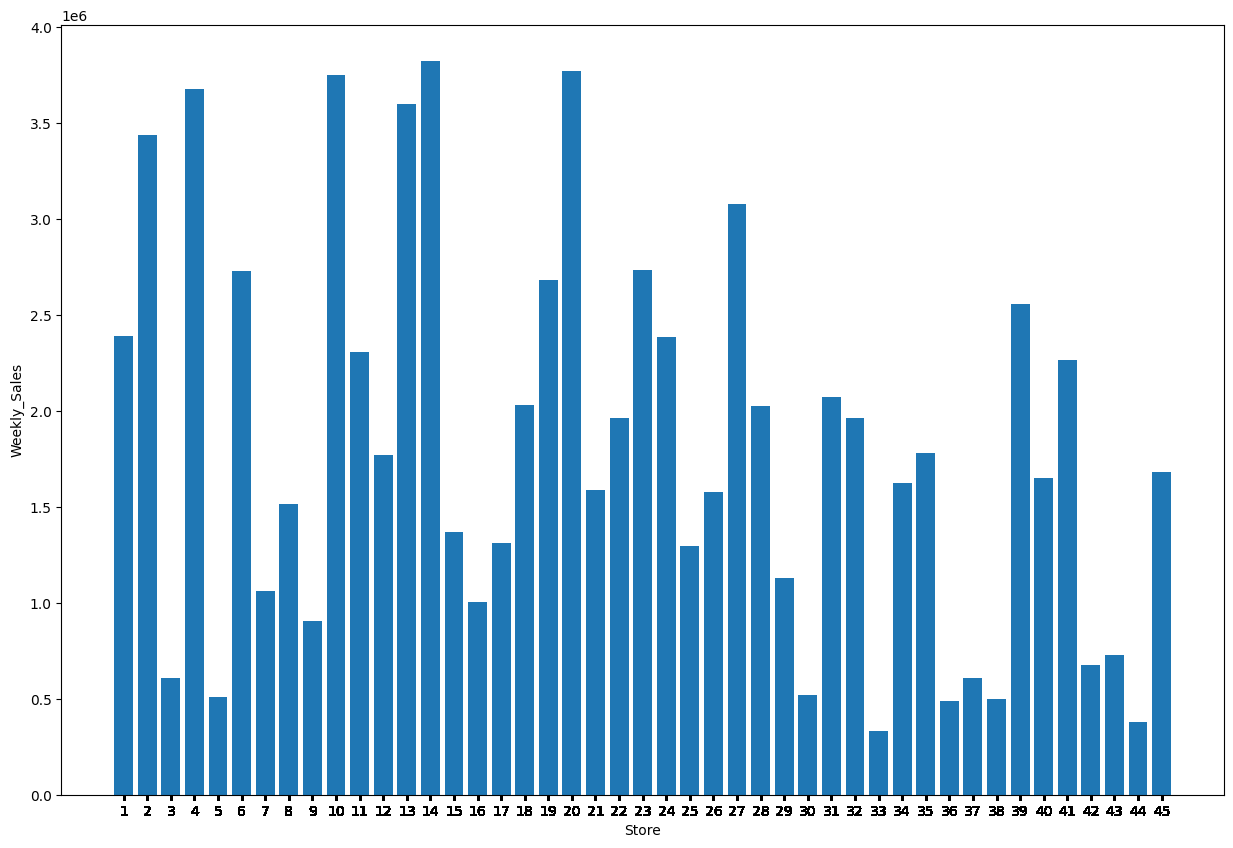

In [23]:
plt.figure(figsize=(15,10))
plt.bar(x=data['Store'],height=data['Weekly_Sales'])
plt.xlabel("Store")
plt.ylabel("Weekly_Sales")
plt.xticks(data['Store'])

In [24]:
data.groupby(['Store'])['Weekly_Sales'].sum().sort_values(ascending=False)

Store
20    3.013978e+08
4     2.995440e+08
14    2.889999e+08
13    2.865177e+08
2     2.753824e+08
10    2.716177e+08
27    2.538559e+08
6     2.237561e+08
1     2.224028e+08
39    2.074455e+08
19    2.066349e+08
31    1.996139e+08
23    1.987506e+08
24    1.940160e+08
11    1.939628e+08
28    1.892637e+08
41    1.813419e+08
32    1.668192e+08
18    1.551147e+08
22    1.470756e+08
12    1.442872e+08
26    1.434164e+08
34    1.382498e+08
40    1.378703e+08
35    1.315207e+08
8     1.299512e+08
17    1.277821e+08
45    1.123953e+08
21    1.081179e+08
25    1.010612e+08
43    9.056544e+07
15    8.913368e+07
7     8.159828e+07
42    7.956575e+07
9     7.778922e+07
29    7.714155e+07
16    7.425243e+07
37    7.420274e+07
30    6.271689e+07
3     5.758674e+07
38    5.515963e+07
36    5.341221e+07
5     4.547569e+07
44    4.329309e+07
33    3.716022e+07
Name: Weekly_Sales, dtype: float64

Store 20 has the highest sales over 3 years

<BarContainer object of 6435 artists>

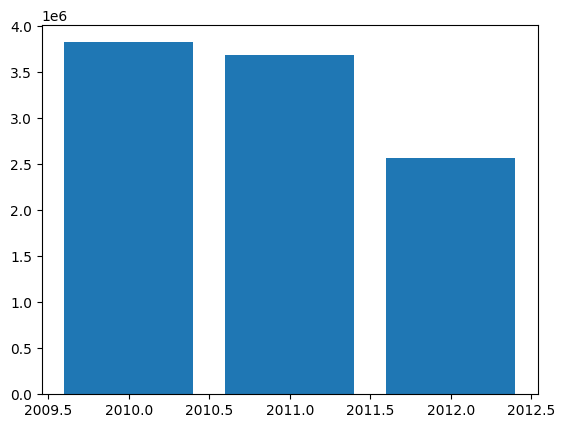

In [25]:
plt.bar(x= data['year'],height = data['Weekly_Sales'])

Year 2010 had the heighest sales, Sales are decreasing over years, there is a massive drop from 2011 to 2012

([<matplotlib.axis.XTick at 0x7f79d555aec0>,
  ...],
 [Text(2, 0, '2'),
  Text(2, 0, '2'),
  Text(2, 0, '2'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(3, 0, '3'),
  Text(3, 0, '3'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(4, 0, '4'),
  Text(4, 0, '4'),
  Text(4, 0, '4'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(5, 0, '5'),
  Text(5, 0, '5'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(6, 0, '6'),
  Text(6, 0, '6'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(7, 0, '7'),
  Text(7, 0, '7'),
  Text(7, 0, '7'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(8, 0, '8'),
  Text(8, 0, '8'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(9, 0, '9'),
  Text(9, 0, '9'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(10, 0, '10'),
  Text(10, 0, '10'),
  Text(10, 0, '10'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(11, 0, '11'),
  Text(11, 0, '11'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(12, 0, '12'),
  Text(12, 0, '12'),
  Text(12, 0, '12'),
  Text(12, 0, '12'),
  Text(

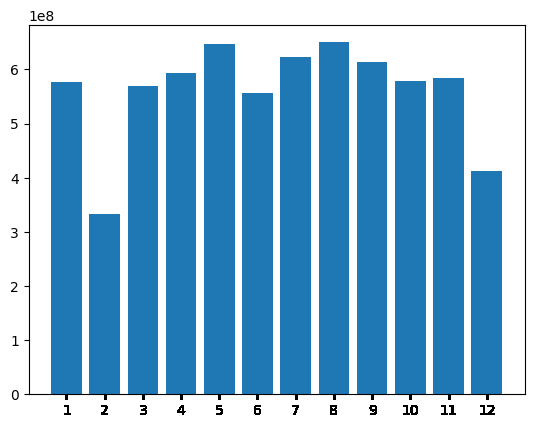

In [26]:
plt.bar(data['month'].unique(),data.groupby(['month'])['Weekly_Sales'].sum())
plt.xticks(data['month'])

The month of febrauary and December had the least sales

<Axes: xlabel='month', ylabel='Weekly_Sales'>

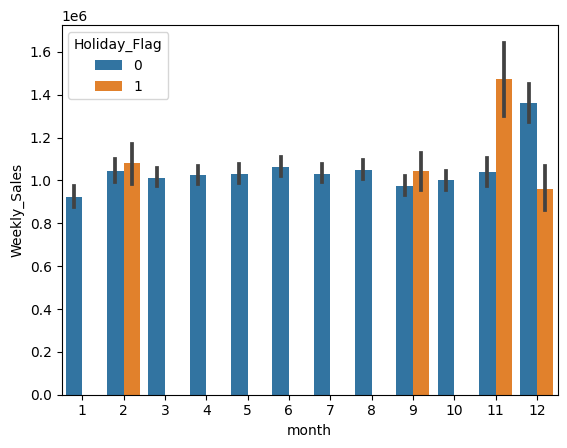

In [27]:
sns.barplot(x=data['month'],y=data['Weekly_Sales'],hue=data['Holiday_Flag'])

Even though we have less data for holidays, but the sales on holidays were higher when compared with non holidays

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Weekly_Sales  6435 non-null   float64
 2   Holiday_Flag  6435 non-null   int64  
 3   Temperature   6435 non-null   float64
 4   Fuel_Price    6435 non-null   float64
 5   CPI           6435 non-null   float64
 6   Unemployment  6435 non-null   float64
 7   year          6435 non-null   int64  
 8   month         6435 non-null   int64  
 9   day           6435 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 502.9 KB


<Axes: xlabel='Temperature', ylabel='Weekly_Sales'>

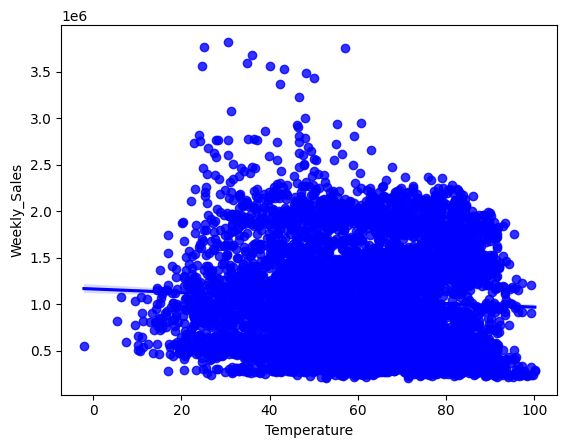

In [29]:
sns.regplot(x=data['Temperature'],y=data['Weekly_Sales'],color='blue')

<Axes: xlabel='Unemployment', ylabel='Weekly_Sales'>

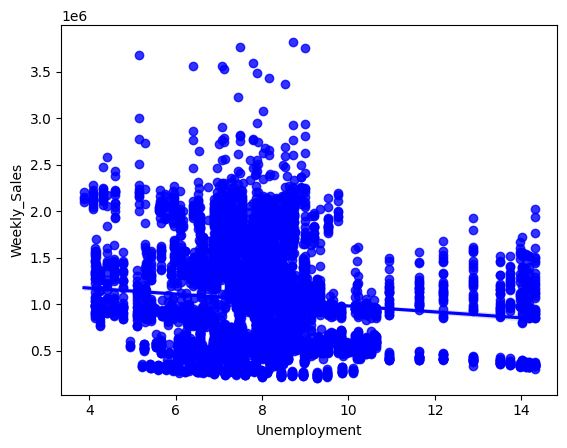

In [30]:
sns.regplot(x=data['Unemployment'],y=data['Weekly_Sales'],color='blue')

<Axes: xlabel='CPI', ylabel='Weekly_Sales'>

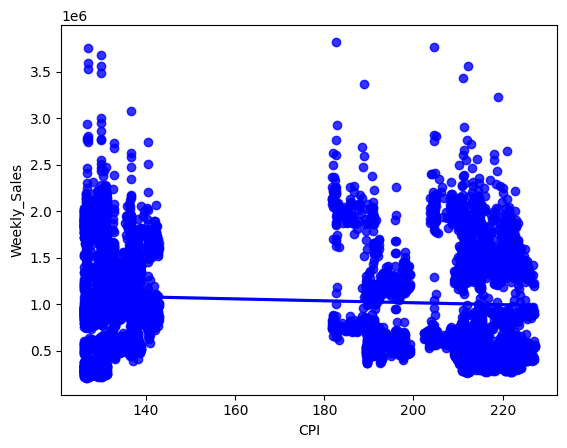

In [31]:
sns.regplot(x=data['CPI'],y=data['Weekly_Sales'],color='blue')

<Axes: xlabel='Fuel_Price', ylabel='Weekly_Sales'>

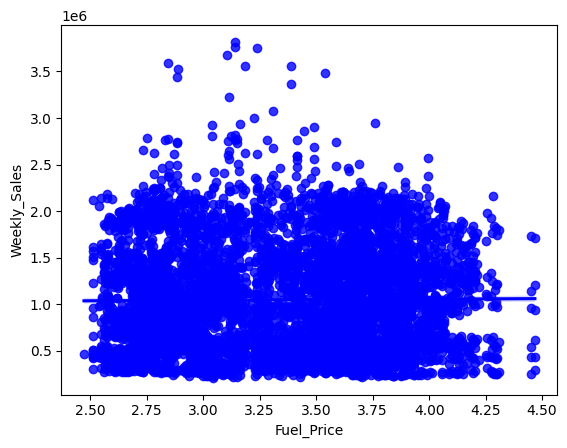

In [32]:
sns.regplot(x=data['Fuel_Price'],y=data['Weekly_Sales'],color='blue')

In [33]:
data.corr()

Store  Weekly_Sales  Holiday_Flag  Temperature  \
Store         1.000000e+00     -0.335332 -4.386841e-16    -0.022659   
Weekly_Sales -3.353320e-01      1.000000  3.689097e-02    -0.063810   
Holiday_Flag -4.386841e-16      0.036891  1.000000e+00    -0.155091   
Temperature  -2.265908e-02     -0.063810 -1.550913e-01     1.000000   
Fuel_Price    6.002295e-02      0.009464 -7.834652e-02     0.144982   
CPI          -2.094919e-01     -0.072634 -2.162091e-03     0.176888   
Unemployment  2.235313e-01     -0.106176  1.096028e-02     0.101158   
year          3.474318e-12     -0.018378 -5.678257e-02     0.064269   
month         2.910676e-15      0.076143  1.229958e-01     0.235862   
day           1.478526e-15     -0.017409  4.452608e-02     0.026973   

              Fuel_Price       CPI  Unemployment          year         month  \
Store           0.060023 -0.209492      0.223531  3.474318e-12  2.910676e-15   
Weekly_Sales    0.009464 -0.072634     -0.106176 -1.837754e-02  7.614332e-02   
Holiday_Flag   -0.078347 -0.002162      0.010960 -5.678257e-02  1.229958e-01   
Temperature     0.144982  0.176888      0.101158  6.426923e-02  2.358618e-01   
Fuel_Price      1.000000 -0.170642     -0.034684  7.794703e-01 -4.215590e-02   
CPI            -0.170642  1.000000     -0.302020  7.479573e-02  4.979672e-03   
Unemployment   -0.034684 -0.302020      1.000000 -2.418135e-01 -1.274559e-02   
year            0.779470  0.074796     -0.241813  1.000000e+00 -1.944645e-01   
month          -0.042156  0.004980     -0.012746 -1.944645e-01  1.000000e+00   
day             0.028073  0.002684     -0.004233  6.405867e-03  1.519184e-02   

                       day  
Store         1.478526e-15  
Weekly_Sales -1.740946e-02  
Holiday_Flag  4.452608e-02  
Temperature   2.697332e-02  
Fuel_Price    2.807253e-02  
CPI           2.684300e-03  
Unemployment -4.233293e-03  
year          6.405867e-03  
month         1.519184e-02  
day           1.000000e+00

<Axes: >

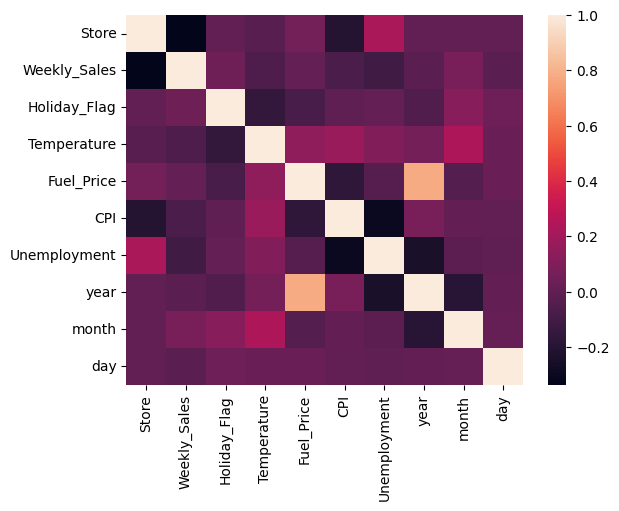

In [34]:
sns.heatmap(data.corr())

We dont find any major correaltion with the Weekly sales, but year is highly correlated with fuel price

Since, year is categorical variable, we ll replace it with 0,1,2 and for the numnerical columns we ll standardise the values since all the values are in different units

In [35]:
data['year']=data['year'].map({2010:0,2011:1,2012:2})

In [36]:
data.head()

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price         CPI  \
0      1    1643690.90             0        42.31       2.572  211.096358   
1      1    1641957.44             1        38.51       2.548  211.242170   
2      1    1611968.17             0        39.93       2.514  211.289143   
3      1    1409727.59             0        46.63       2.561  211.319643   
4      1    1554806.68             0        46.50       2.625  211.350143   

   Unemployment  year  month  day  
0         8.106     0      2    5  
1         8.106     0      2   12  
2         8.106     0      2   19  
3         8.106     0      2   26  
4         8.106     0      3    5

FIND OUTLIERS

{'whiskers': [<matplotlib.lines.Line2D at 0x7f79ce6df040>,
 'caps': [<matplotlib.lines.Line2D at 0x7f79ce6df580>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f79ce6deda0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f79ce6dfac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f79ce6dfd60>],
 'means': []}

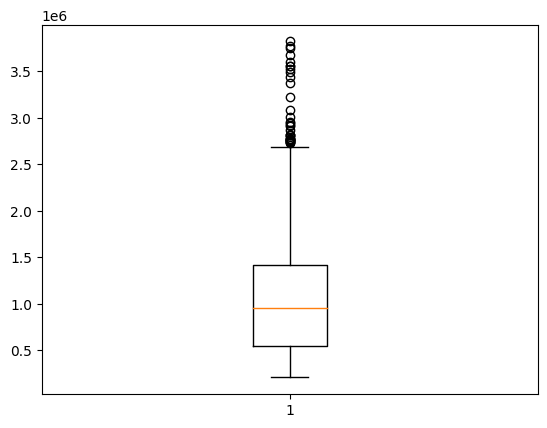

In [37]:
plt.boxplot(data['Weekly_Sales'])

In [38]:
data.describe()

Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.533501e+05      0.000000    47.460000     2.933000   
50%      23.000000  9.607460e+05      0.000000    62.670000     3.445000   
75%      34.000000  1.420159e+06      0.000000    74.940000     3.735000   
max      45.000000  3.818686e+06      1.000000   100.140000     4.468000   

               CPI  Unemployment         year        month          day  
count  6435.000000   6435.000000  6435.000000  6435.000000  6435.000000  
mean    171.578394      7.999151     0.965035     6.447552    15.678322  
std      39.356712      1.875885     0.797019     3.238308     8.755780  
min     126.064000      3.879000     0.000000     1.000000     1.000000  
25%     131.735000      6.891000     0.000000     4.000000     8.000000  
50%     182.616521      7.874000     1.000000     6.000000    16.000000  
75%     212.743293      8.622000     2.000000     9.000000    23.000000  
max     227.232807     14.313000     2.000000    12.000000    31.000000

In [39]:
outlier_upper_limit = data['Weekly_Sales'].mean() + 3*(data['Weekly_Sales'].std())
outlier_lower_limit = 3*(data['Weekly_Sales'].std())-data['Weekly_Sales'].mean()

In [40]:
len(data[data['Weekly_Sales']>outlier_upper_limit]['Weekly_Sales'].index)

30

In [41]:
(30/6435)*100

0.4662004662004662

0.4% of data are outliers and this may effect the regression model, hence dropping these 152 rows

In [42]:
data.drop(data[data['Weekly_Sales']>outlier_upper_limit]['Weekly_Sales'].index, axis=0,inplace=True)

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6405 entries, 0 to 6434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6405 non-null   int64  
 1   Weekly_Sales  6405 non-null   float64
 2   Holiday_Flag  6405 non-null   int64  
 3   Temperature   6405 non-null   float64
 4   Fuel_Price    6405 non-null   float64
 5   CPI           6405 non-null   float64
 6   Unemployment  6405 non-null   float64
 7   year          6405 non-null   int64  
 8   month         6405 non-null   int64  
 9   day           6405 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 550.4 KB


{'whiskers': [<matplotlib.lines.Line2D at 0x7f79ce7ad600>,
 'caps': [<matplotlib.lines.Line2D at 0x7f79ce7adb40>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f79ce7ad360>],
 'medians': [<matplotlib.lines.Line2D at 0x7f79ce7ae080>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f79ce7ae320>],
 'means': []}

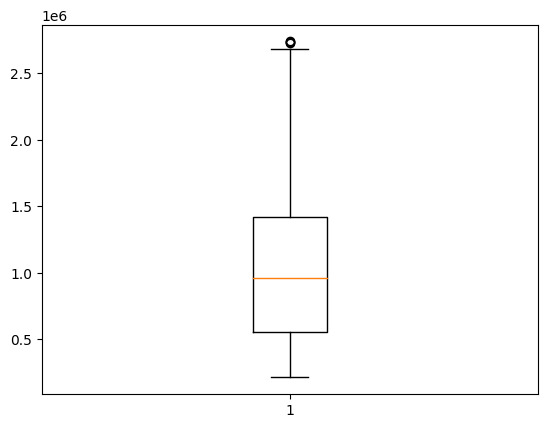

In [44]:
plt.boxplot(data['Weekly_Sales'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f79ce816cb0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f79ce8171f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f79ce816a10>],
 'medians': [<matplotlib.lines.Line2D at 0x7f79ce817730>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f79ce8179d0>],
 'means': []}

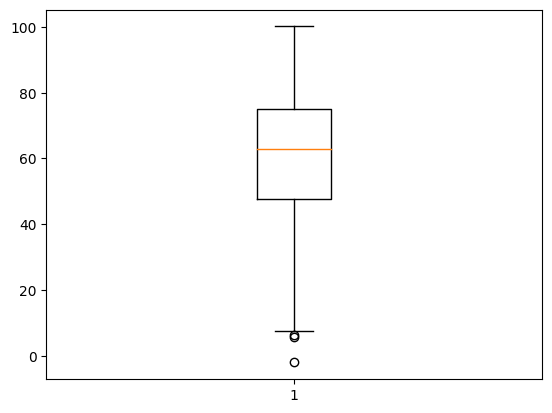

In [45]:
plt.boxplot(data['Temperature'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f79ce8b06a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f79ce8b0be0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f79ce8b0400>],
 'medians': [<matplotlib.lines.Line2D at 0x7f79ce8b1120>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f79ce8b13c0>],
 'means': []}

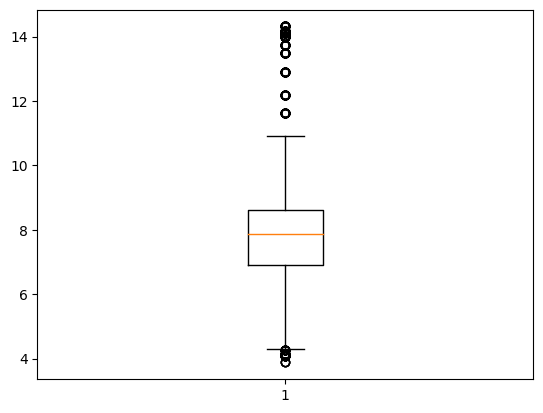

In [46]:
plt.boxplot(data['Unemployment'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f79ce902350>,
 'caps': [<matplotlib.lines.Line2D at 0x7f79ce902770>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f79ce9020b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f79ce902cb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f79ce902f50>],
 'means': []}

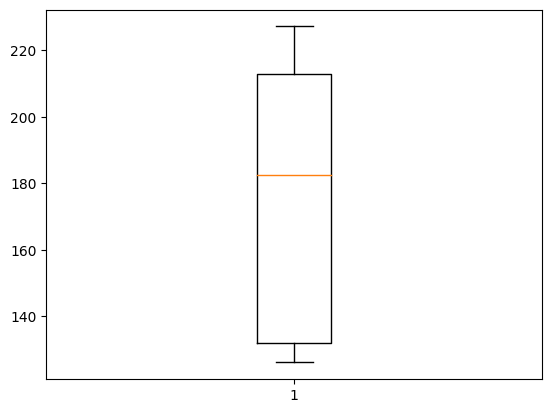

In [47]:
plt.boxplot(data['CPI'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f79ce96b1c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f79ce96b700>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f79ce96af20>],
 'medians': [<matplotlib.lines.Line2D at 0x7f79ce96bc40>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f79ce96bee0>],
 'means': []}

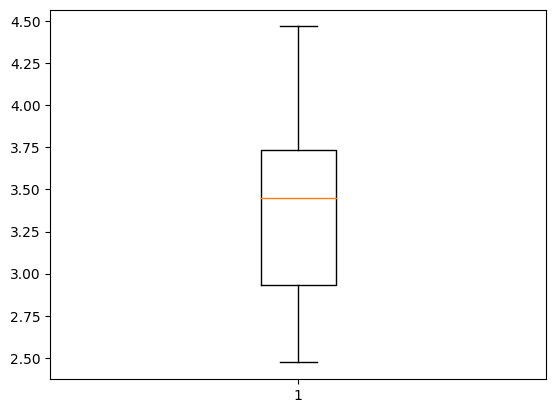

In [48]:
plt.boxplot(data['Fuel_Price'])

In [49]:
outlier_upper_Temperature = data['Temperature'].mean() + 3*(data['Temperature'].std())
outlier_lower_Temperature = 3*(data['Temperature'].std())-data['Temperature'].mean()

In [50]:
data[data['Temperature']<= outlier_lower_Temperature]

Empty DataFrame
Columns: [Store, Weekly_Sales, Holiday_Flag, Temperature, Fuel_Price, CPI, Unemployment, year, month, day]
Index: []

In [51]:
outlier_upper_Unemployment = data['Unemployment'].mean() + 3*(data['Unemployment'].std())
outlier_lower_Unemployment = 3*(data['Unemployment'].std())-data['Unemployment'].mean()

In [52]:
data[data['Unemployment']> outlier_upper_Unemployment]

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price         CPI  \
1573     12    1100046.37             0        49.47       2.962  126.442065   
1574     12    1117863.33             1        47.87       2.946  126.496258   
1575     12    1095421.65             0        54.83       2.915  126.526286   
1576     12    1048617.17             0        50.23       2.825  126.552286   
1577     12    1077018.27             0        53.77       2.987  126.578286   
...     ...           ...           ...          ...         ...         ...   
5359     38     356886.10             0        76.67       4.087  129.062355   
5360     38     396826.06             0        71.81       4.031  129.049032   
5361     38     381763.02             0        78.72       3.981  129.035710   
5362     38     356797.00             0        86.84       3.935  129.043200   
5363     38     354078.95             0        88.95       3.898  129.066300   

      Unemployment  year  month  day  
1573        13.975     0      2    5  
1574        13.975     0      2   12  
1575        13.975     0      2   19  
1576        13.975     0      2   26  
1577        13.975     0      3    5  
...            ...   ...    ...  ...  
5359        13.736     1      5   27  
5360        13.736     1      6    3  
5361        13.736     1      6   10  
5362        13.736     1      6   17  
5363        13.736     1      6   24  

[219 rows x 10 columns]

In [53]:
data.drop(data[data['Unemployment']>outlier_upper_Unemployment]['Unemployment'].index, axis=0,inplace=True)

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6186 entries, 0 to 6434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6186 non-null   int64  
 1   Weekly_Sales  6186 non-null   float64
 2   Holiday_Flag  6186 non-null   int64  
 3   Temperature   6186 non-null   float64
 4   Fuel_Price    6186 non-null   float64
 5   CPI           6186 non-null   float64
 6   Unemployment  6186 non-null   float64
 7   year          6186 non-null   int64  
 8   month         6186 non-null   int64  
 9   day           6186 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 531.6 KB


In [55]:
num_features = ['Temperature','Unemployment','Weekly_Sales','CPI','Fuel_Price']

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


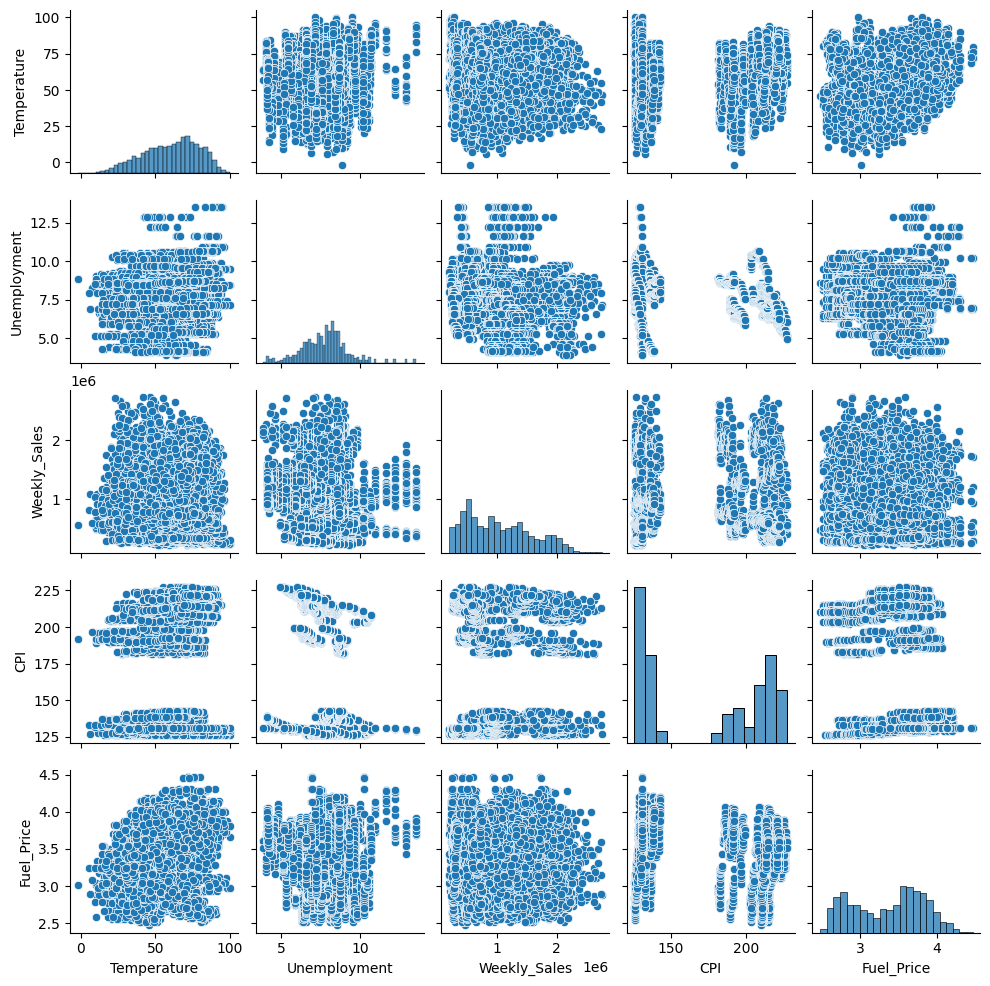

In [56]:
sns.pairplot(data[num_features],size=2)

In [57]:
# Standardize temparature,fuel price,CPI,unemployment
std_features = ['Temperature','Unemployment','CPI','Fuel_Price']


In [58]:
from sklearn.preprocessing import StandardScaler

In [59]:
x_scaler = StandardScaler()
data[std_features]= x_scaler.fit_transform(data[std_features])

In [60]:
data.head()

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price       CPI  \
0      1    1643690.90             0    -0.986762   -1.709680  0.968318   
1      1    1641957.44             1    -1.192609   -1.761663  0.972045   
2      1    1611968.17             0    -1.115687   -1.835305  0.973245   
3      1    1409727.59             0    -0.752746   -1.733505  0.974025   
4      1    1554806.68             0    -0.759788   -1.594884  0.974804   

   Unemployment  year  month  day  
0      0.210143     0      2    5  
1      0.210143     0      2   12  
2      0.210143     0      2   19  
3      0.210143     0      2   26  
4      0.210143     0      3    5

In [61]:
#explicitlty standardize Weekly_Sales
data['Weekly_Sales'] = (data['Weekly_Sales']-data['Weekly_Sales'].mean())/data['Weekly_Sales'].std()

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6186 entries, 0 to 6434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6186 non-null   int64  
 1   Weekly_Sales  6186 non-null   float64
 2   Holiday_Flag  6186 non-null   int64  
 3   Temperature   6186 non-null   float64
 4   Fuel_Price    6186 non-null   float64
 5   CPI           6186 non-null   float64
 6   Unemployment  6186 non-null   float64
 7   year          6186 non-null   int64  
 8   month         6186 non-null   int64  
 9   day           6186 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 531.6 KB


In [63]:
X = data.drop(['Weekly_Sales'],axis=1)
y= data['Weekly_Sales']

In [64]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [65]:
import statsmodels.api as sm

In [66]:
Reg_Clf = sm.OLS(y_train,x_train).fit()

In [67]:
print(Reg_Clf.summary2())

                        Results: Ordinary least squares
Model:                  OLS              Adj. R-squared (uncentered): 0.114     
Dependent Variable:     Weekly_Sales     AIC:                         13448.3951
Date:                   2023-06-13 09:54 BIC:                         13506.9557
No. Observations:       4948             Log-Likelihood:              -6715.2   
Df Model:               9                F-statistic:                 72.04     
Df Residuals:           4939             Prob (F-statistic):          1.81e-125 
R-squared (uncentered): 0.116            Scale:                       0.88537   
-----------------------------------------------------------------------------------
                     Coef.     Std.Err.       t        P>|t|      [0.025     0.975]
-----------------------------------------------------------------------------------
Store               -0.0222      0.0010    -22.3800    0.0000    -0.0242    -0.0203
Holiday_Flag         0.0496      0.0544  

In [68]:
Reg_Clf.params

Store          -0.022226
Holiday_Flag    0.049635
Temperature    -0.039775
Fuel_Price     -0.085929
CPI            -0.162710
Unemployment   -0.045008
year            0.147861
month           0.042959
day             0.003592
dtype: float64

In [69]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [70]:
y_pred = Reg_Clf.predict(x_test)

In [71]:
r2_score(y_test,y_pred)

0.13365816470759906

In [72]:
mean_squared_error(y_test,y_pred)

0.8664208459487621

<Axes: xlabel='coef', ylabel='columns'>

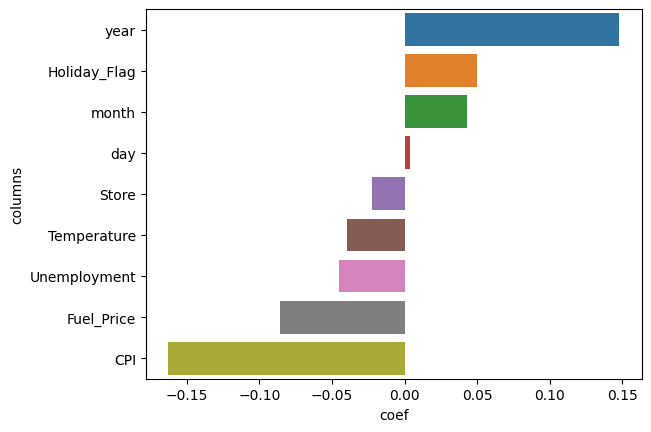

In [73]:
#plot the coeff values
data_coef = pd.DataFrame({
    'columns':X.columns,
    'coef': Reg_Clf.params
})
data_coef_sort = data_coef.sort_values('coef',ascending=False)
sns.barplot(x='coef',y='columns',data=data_coef_sort)

Year,Month,Holiday_flag are the top 3 influential features whoch determine the Sales

Since the performance metrics of the linear regression model is not so good, lets try building the model using decision trees

In [74]:
from sklearn.tree import DecisionTreeRegressor

In [75]:
Tree_Clf = DecisionTreeRegressor()

In [76]:
Tree_Clf.fit(x_train,y_train)

DecisionTreeRegressor()

In [77]:
from sklearn.tree import plot_tree

In [78]:
y_pred = Tree_Clf.predict(x_test)

In [79]:
y_pred

array([ 0.36894449, -0.64417642, -0.71004173, ..., -0.34530489,
       -0.88795853,  1.53726343])

In [80]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [81]:
r2_score(y_test,y_pred)

0.9466331031109233

In [82]:
mean_squared_error(y_test,y_pred)

0.05337176396738157

In [83]:
mean_absolute_error(y_test,y_pred)

0.12410322083038502

From the above analysis, Decision tree performs well with the given data with r2_score of 94%, hence we will go ahead with DecisionTreeRegressor